<a href="https://colab.research.google.com/github/sis00211/4dong4dong/blob/main/anomaly_check.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
os.chdir("/content/gdrive/My Drive/Colab Notebooks")

In [ ]:
data = pd.read_csv('Charleston AMI kwh.csv', index_col = "Read End Time", parse_dates=True)

In [ ]:
data.head()

,Channel Name,Total kwh,9362018 kwh,Export kwh
Read End Time,,,,
2022-01-01 00:05:00,KWH 5 Minute Interval Read,1.260,1.260,0.0
2022-01-01 00:10:00,KWH 5 Minute Interval Read,1.224,1.224,0.0
2022-01-01 00:15:00,KWH 5 Minute Interval Read,1.188,1.188,0.0
2022-01-01 00:20:00,KWH 5 Minute Interval Read,1.188,1.188,0.0
2022-01-01 00:25:00,KWH 5 Minute Interval Read,1.260,1.260,0.0


abigail.index[0].month
abigail.index[0].dayofweek
abigail.index[0].week
abigail.index[0].is_leap_year
abigail.index[0].hour

In [ ]:
data_daily = data.resample("D").sum()
data_daily.head()

,Channel Name,Total kwh,9362018 kwh,Export kwh
Read End Time,,,,
2022-01-01,KWH 5 Minute Interval ReadKWH 5 Minute Interva...,473.472,473.472,0.000
2022-01-02,KWH 5 Minute Interval ReadKWH 5 Minute Interva...,318.204,319.392,1.188
2022-01-03,KWH 5 Minute Interval ReadKWH 5 Minute Interva...,722.736,722.736,0.000
2022-01-04,KWH 5 Minute Interval ReadKWH 5 Minute Interva...,587.124,598.824,11.700
2022-01-05,KWH 5 Minute Interval ReadKWH 5 Minute Interva...,625.284,625.284,0.000


In [ ]:
data = data_daily

<Axes: xlabel='Read End Time'>

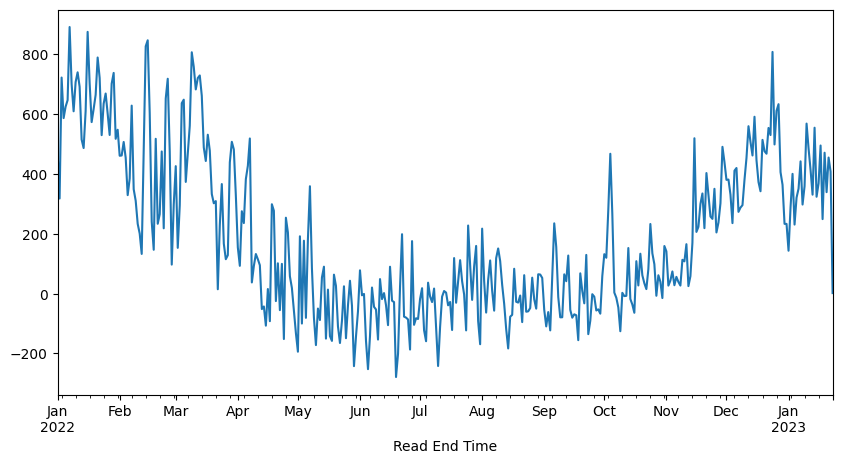

In [ ]:
column = data["Total kwh"]
column.plot(figsize=(10,5))

In [ ]:
N = len(column)
time = np.arange(0,N)
(len(data),len(time))

(388, 388)

In [ ]:
window_percentage = 5
k = int(len(column) * (window_percentage/100))
N = len(column)
(k,N)

(19, 388)

In [ ]:
column = column.to_numpy()

In [ ]:
get_bands = lambda data : (np.mean(data) + 3*np.std(data),np.mean(data) - 3*np.std(data))

In [ ]:
bands = [get_bands(column[range(0 if i - k < 0 else i-k ,i + k if i + k < N else N)]) for i in range(0,N)]
upper, lower = zip(*bands)

In [ ]:
anomalies = (column > upper) | (column < lower)

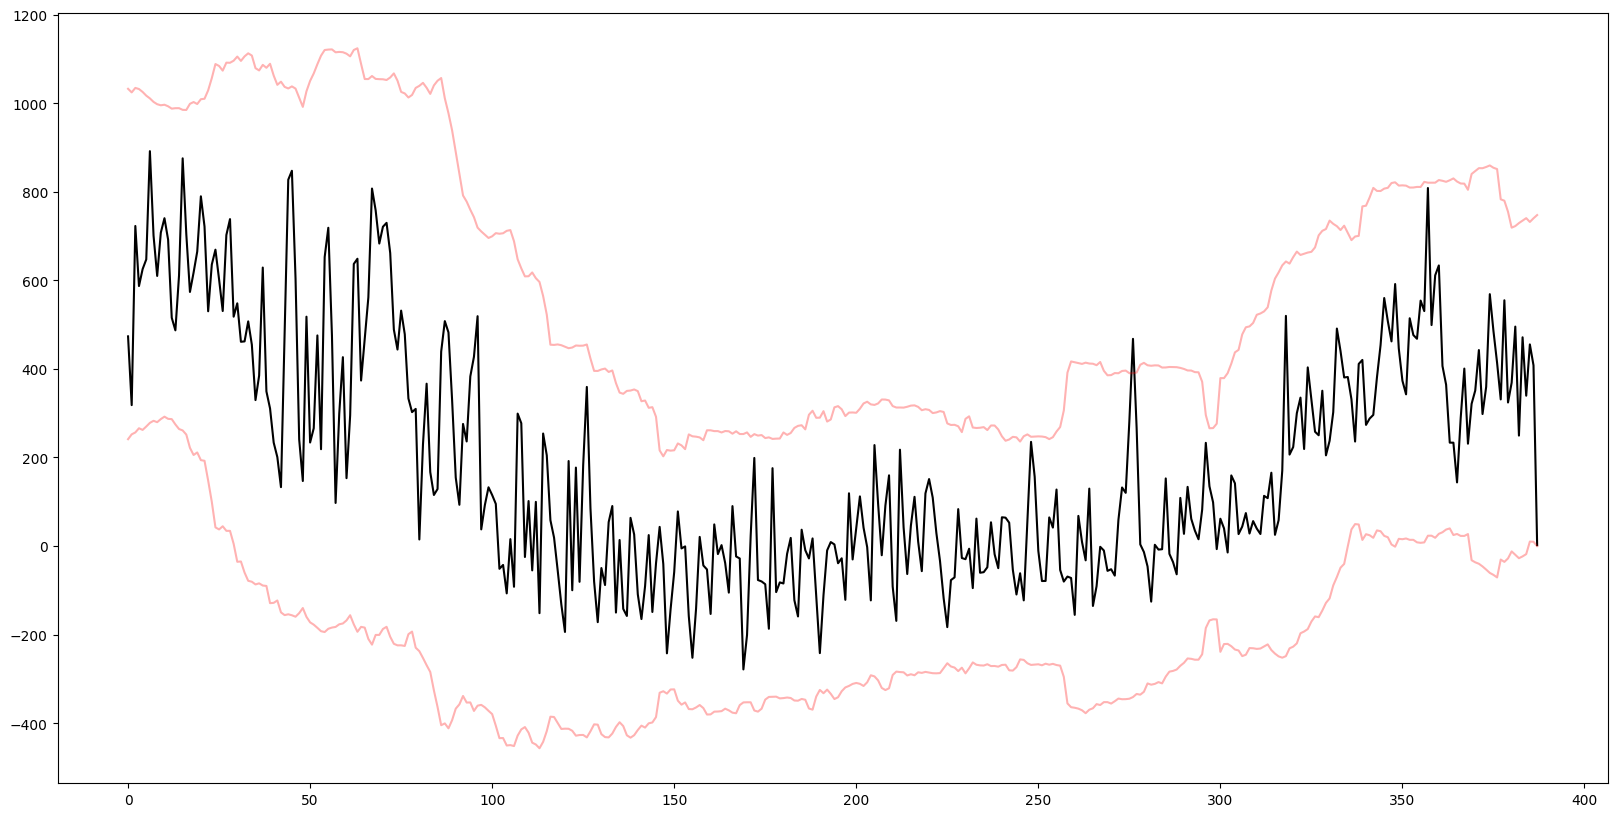

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(time,column,'k',label='Data')
plt.plot(time,upper,'r-',label='Bands',alpha=0.3)
plt.plot(time,lower,'r-',alpha=0.3)

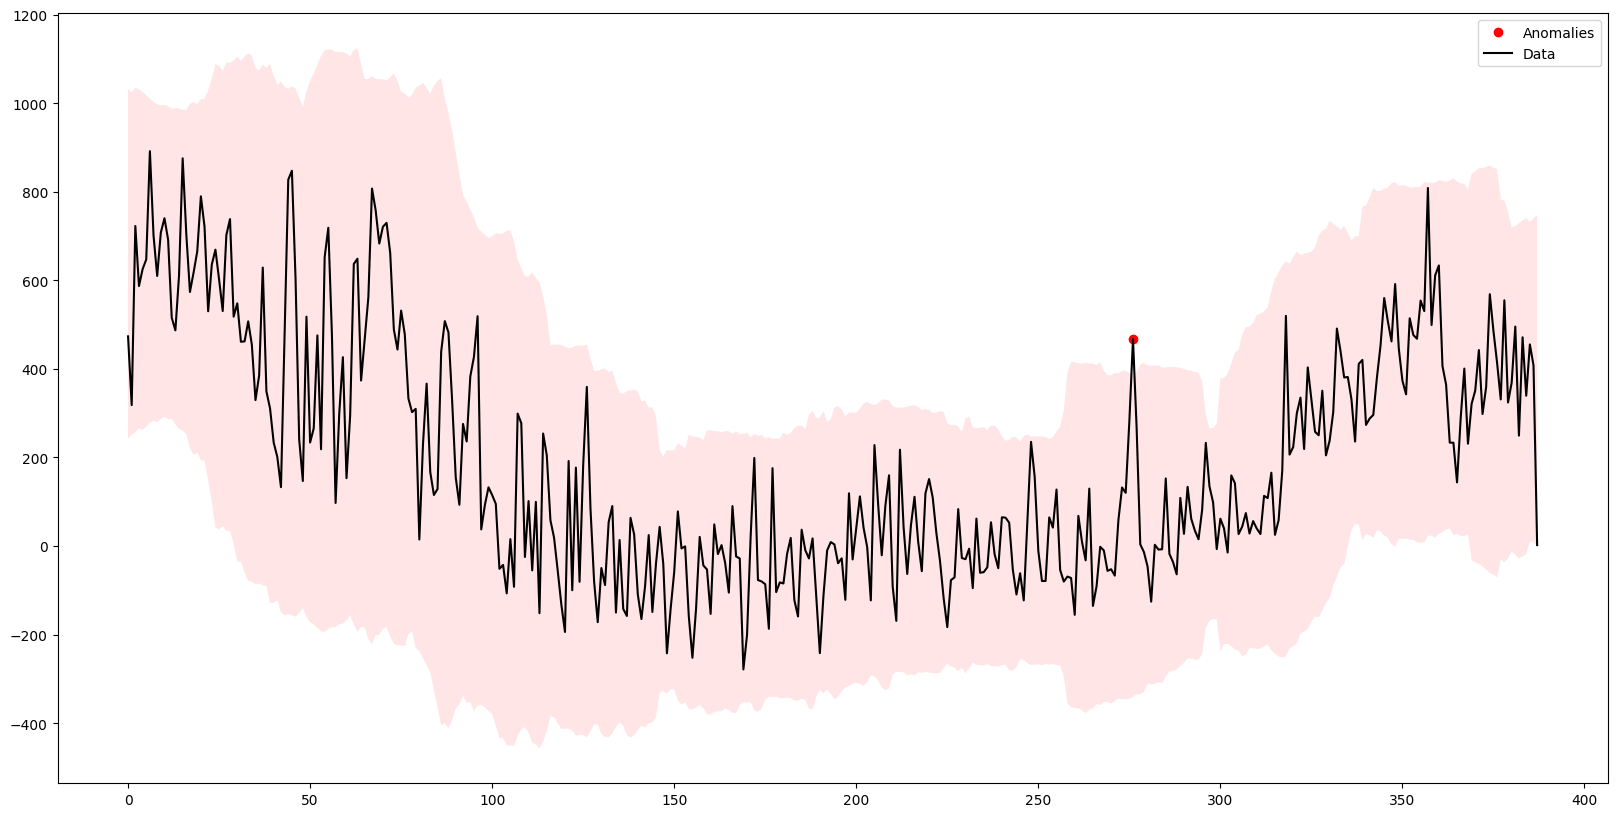

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(time[anomalies],column[anomalies],'ro',label='Anomalies')
plt.fill_between(time, upper, lower,facecolor='red',alpha=0.1)
plt.plot(time,column,'k',label='Data')
plt.legend()